<a href="https://colab.research.google.com/github/AnastasiaSperanskaya/OptimizationMethodsITMO/blob/master/lab2/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pylab as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def draw_lines(plt, lines, start_point, min_point):
  for start in start_point:
    plt.plot(start[0], start[1], 'bo')
  for line in lines:
    plt.plot(line[0], line[1], '-b')
  plt.plot(min_point[0], min_point[1], 'ro')
  return plt
  
def draw_func_level(f, x_diapos, y_diapos, size=(8, 8)):

  x = np.arange(x_diapos[0],x_diapos[1], 0.010)
  y = np.arange(y_diapos[0],y_diapos[1], 0.010)
  x, y = np.meshgrid(x, y)
  z = f([x, y])

  fig, ax = plt.subplots()
  cs = ax.contour(x, y, z, levels=np.linspace(1, 100, 25))
  return plt

def show_plt(f):
  fig = plt.figure(figsize = (10, 10))
  ax = fig.add_subplot(1, 1, 1, projection = '3d')

  x1 = np.linspace(-5, 5, 1000)
  x2 = np.linspace(-5, 5, 1000)
  x, y = np.meshgrid(x1, x2)
  z = f([x, y])

  surf = ax.plot_surface( x, y, z, rstride = 10, cstride = 10, cmap = cm.rainbow)

#Функции

In [ ]:
def f1(x):
   return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

def f2(x):
   return (x[1] - x[0]**2)**2 + (1 - x[0])**2

def f3(x):
  return (1.5 - x[0]*(1 - x[1]))**2 + (2.25 - x[0] * (1 - x[1]**2))**2 + (2.625 - x[0]*(1 - x[1]**3))**2

def f4(x):
  return (x[0] + x[1])**2 + 5*(x[2] - x[3])**2 + (x[1] - 2*x[2])**4 + 10*(x[0] - x[3])**4

##График 1-й функции

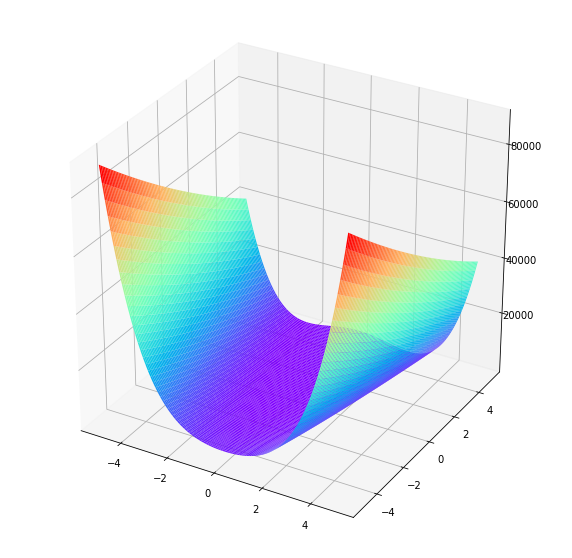

In [ ]:
show_plt(f1)

##График 2-й функции

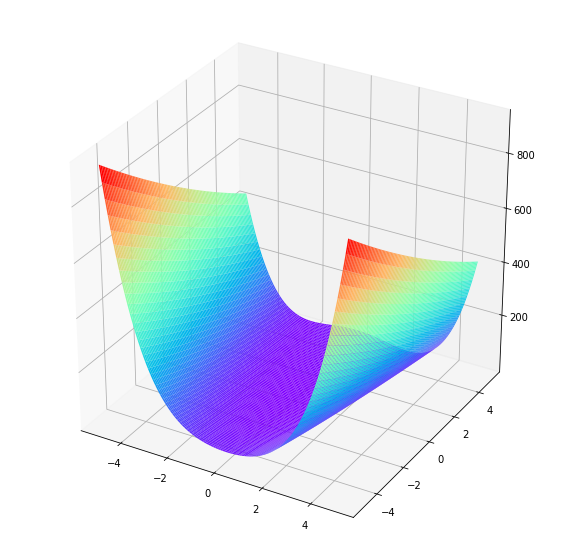

In [ ]:
show_plt(f2)

##График 3-й функции

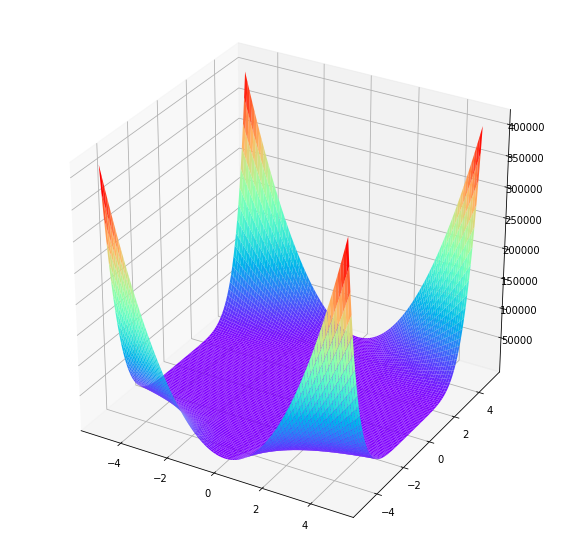

In [ ]:
show_plt(f3)

#Производные

In [ ]:
def f1_d1(x):
  return 400*x[0]**3 - 400*x[0]*x[1] + 2*x[0] - 2

def f1_d2(x):
  return 200*(x[1] - x[0]**2)

def f2_d1(x):
  return 4*x[0]**3 - 4*x[0]*x[1] + 2*x[0] - 2

def f2_d2(x):
  return 2*(x[1] - x[0]**2)

def f3_d1(x):
  return x[0]*(6 - 4*x[1] - 2*x[1]**2 + 2*x[1]**4 - 4*x[1]**3 + 2*x[1]**6) + 5.5*x[1]**3 + 4.5*x[1]**2 + 3*x[1] - 13

def f3_d2(x):
  return x[1]*(9*x[0] - 2*x[0]**2) + (16.5*x[0] - 6*x[0]**2)*x[1]**2 + (4*x[1]**3 + 6*x[1]**5 - 2)*x[0]**2 + 3*x[0]

def f4_d1(x):
  return 2*x[0] + 2*x[1] + 40*x[0]**3 - 120*x[3]*x[0]**2 + 120*x[0]*x[3]**2 - 40*x[3]**3

def f4_d2(x):
  return 2*x[0] + 2*x[1] + 4*x[1]**3 - 24*x[2]*x[1]**2 + 48*x[1]*x[2]**2 - 32*x[2]**3

def f4_d3(x):
  return 10*x[2] - 10*x[3] - 8*x[1]**3 + 48*x[2]*x[1]**2 - 96*x[1]*x[2]**2 + 64*x[2]**3

def f4_d4(x):
  return 10*x[3] - 10*x[2] - 40*x[0]**3 + 120*x[3]*x[0]**2 - 120*x[0]*x[3]**2 + 40*x[3]**3

# Метод Брендта с производной





##Реализация

In [ ]:
def parab(a, b, a_d, b_d):
  return 2*(((a-b)*(a_d - b_d) - b_d - b_d*(a-b)) / (a_d - b_d))

In [ ]:
def get_sign(x):
  return 1 if x >= 0 else -1

In [ ]:
def brent_d_method(f, f_d, a, b, eps):
  x, w, v = (a + b) / 2, (a + b) / 2, (a + b)/2
  f_x, f_w, f_v = f(x), f(w), f(v)
  f_x_d, f_w_d, f_v_d = f_d(x), f_d(w), f_d(v)

  d, e = b - a, (b - a) + eps
  count = 0

  while abs(a-b) > 3*eps and d != e:
    count += 1
    print(count, ") ", a, b, x)

    g, e = e, d
    u1, u2 = None, None

    if x != w and f_x_d != f_w_d:
      u1 = parab(w, x, f_w_d, f_x_d)
      if not (((a+eps) <= u1 <= (b-eps)) and ((u1 - x) < g/2)):
        u1 = None
    
    if x != v and f_x_d != f_v_d:
      u2 = parab(v, x, f_v_d, f_x_d)
      if not (((a+eps) <= u2 <= (b-eps)) and ((u2 - x) < g/2)):
        u2 = None

    if u1 or u2:
      if u1 and u2:
        u = u1 if abs(u1 - x) > abs(u2 - x) else u2

    else:
      if f_x_d > 0:
        u = (a+x)/2
      else:
        u = (x+b)/2

    if abs(u-x) < eps:
      u = x + get_sign(u-x)*eps

    d = abs(x-u)
    f_u, f_u_d = f(u), f_d(u)

    
    if f_u <= f_x:
      if u >= x:
        a = x
      else:
        b = x
      
      v, w, x = w, x, u
      f_v, f_w, f_x = f_w, f_x, f_u
      f_v_d, f_w_d, f_x_d = f_w_d, f_x_d, f_u_d
    else:
      if u >= x:
        b = u
      else:
        a = u

      if f_u <= f_w or w == x:
        v, w = w, u
        f_v, f_w = f_w, f_u
        f_v_d, f_w_d = f_w_d, f_u_d
      elif f_u <= f_v or v == x or v == w:
        v = u
        f_v = f_u
        f_v_d = f_u_d

  return {
      'iterations' : count,
      'min': x
      }

In [ ]:
def t_f(x):
  return x**3 + x**2 + x + 1
def t_f_d(x):
  return 3*x**2 + 2*x + 1

In [ ]:
brent_d_method(t_f, t_f_d, 0, 10, 0.000000001)

1 )  0 10 5.0
2 )  0 5.0 2.5
3 )  0 2.5 2.1714285714285713
4 )  0 2.1714285714285713 1.0857142857142856
5 )  0 1.0857142867142857 1.0857142857142856
6 )  0 1.0857142857142856 0.5428571428571428
7 )  0 0.5428571428571428 0.2714285714285714
8 )  0 0.27142857242857144 0.2714285714285714
9 )  0 0.2714285714285714 0.1357142857142857
10 )  0 0.1357142857142857 0.06785714285714285
11 )  0 0.06785714285714285 0.033928571428571426
12 )  0 0.033928571428571426 0.016964285714285713
13 )  0 0.016964285714285713 0.008482142857142856
14 )  0 0.008482142857142856 0.004241071428571428
15 )  0 0.004241071428571428 0.002120535714285714
16 )  0 0.002120535714285714 0.001060267857142857
17 )  0 0.001060267857142857 0.0005301339285714285
18 )  0 0.0005301339285714285 0.00026506696428571427
19 )  0 0.00026506696428571427 0.00013253348214285713
20 )  0 0.00013253348214285713 6.626674107142857e-05
21 )  0 6.626674107142857e-05 3.313337053571428e-05
22 )  0 3.313337053571428e-05 1.656668526785714e-05
23 )  0 1

{'iterations': 35, 'min': 1.0111502238682337e-09}

# Покоординатный спуск

##Реализация

In [ ]:
g_ratio = 0.5 * (1.0 + math.sqrt(5))

In [ ]:
def distance(x, y):
  result = 0
  try:
    for i in range(len(x)):
      result += (x[i] - y[i])**2
  except:
    for d_f in x:
      result += d_f(y)**2
  return math.sqrt(result)

def save_iteration(a, b):
  c = []
  for i in range(len(a)+1):
    arr = []
    for j in range(len(a)-i):
      arr.append(a[j])
    for j in range(len(arr), len(a)):
      arr.append(b[j]) 
    c.append(arr)
  return np.array(c).T

def minimize(f, eps, diapos, n_demen, current_x):
  a, b = diapos[0], diapos[1]
  x1, x2 = current_x.copy(), current_x.copy()
  x1[n_demen], x2[n_demen] = a, b

  d = abs(f(x1)-f(x2))
  if d < eps:
    return (a+b)/2
  else:
    t = (b-a)/g_ratio
    x1[n_demen], x2[n_demen] = b-t, a+t
    q1, q2 = f(x1), f(x2)
    if q1 >= q2:
      return minimize(f, eps, (x1[n_demen],b), n_demen, current_x)
    else:
      return minimize(f, eps, (a, x2[n_demen]), n_demen, current_x)



def coordinate_method(f, x_start, eps, max_iter=10000, save_lines=False):
  x_current = x_start.copy()
  x_prev = [0]*len(x_start)
  lines = []
  count = 0

  x_diapos = [(-100, 100)] * len(x_start)

  while (distance(x_prev, x_current) >= eps) or (abs(f(x_prev) -  f(x_current)) >= eps):
    count += 1

    if count > max_iter:
      break

    x_prev = x_current.copy()
    for i in range(len(x_start)):
      x_current[i] = minimize(f, eps, x_diapos[i], i, x_current)

    if save_lines:
      lines.append(save_iteration(x_prev, x_current))


  return {
      'min': x_current,
      'iterations': count,
      'lines': lines
      }

##F1(x)

[0.9357716394434019, 0.875625539078055] 556
0.004125467389970663


<module 'pylab' from '/usr/local/lib/python3.6/dist-packages/pylab.py'>

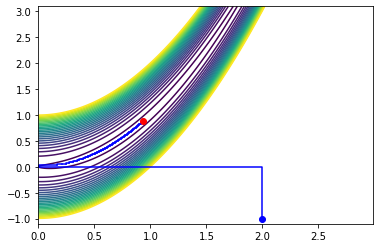

In [ ]:
result = coordinate_method(f1, [2, -1], 0.00001, save_lines=True)
plot = draw_func_level(f1, (0, 3), (-1.1, 3.1))
print(result['min'], result['iterations'])
print(f1(result['min']))
draw_lines(plot, result['lines'], [(2, -1)], result['min'])

In [ ]:
print(result['lines'])

[array([[ 2.00000000e+00,  2.00000000e+00,  4.96315468e-03],
       [-1.00000000e+00, -1.64365049e-16, -1.64365049e-16]]), array([[ 4.96315468e-03,  4.96315468e-03,  1.61409453e-01],
       [-1.64365049e-16,  2.60743831e-02,  2.60743831e-02]]), array([[0.16140945, 0.16140945, 0.21140156],
       [0.02607438, 0.0447143 , 0.0447143 ]]), array([[0.21140156, 0.21140156, 0.24505113],
       [0.0447143 , 0.06000538, 0.06000538]]), array([[0.24505113, 0.24505113, 0.27103854],
       [0.06000538, 0.07345446, 0.07345446]]), array([[0.27103854, 0.27103854, 0.2924312 ],
       [0.07345446, 0.08557065, 0.08557065]]), array([[0.2924312 , 0.2924312 , 0.3109304 ],
       [0.08557065, 0.09672235, 0.09672235]]), array([[0.3109304 , 0.3109304 , 0.32704526],
       [0.09672235, 0.10696331, 0.10696331]]), array([[0.32704526, 0.32704526, 0.34145882],
       [0.10696331, 0.11660819, 0.11660819]]), array([[0.34145882, 0.34145882, 0.35445253],
       [0.11660819, 0.12560323, 0.12560323]]), array([[0.35445253,

##F2(x)

[0.9999985281607797, 0.9999955328288848] 48
4.48734722075198e-12


<module 'pylab' from '/usr/local/lib/python3.6/dist-packages/pylab.py'>

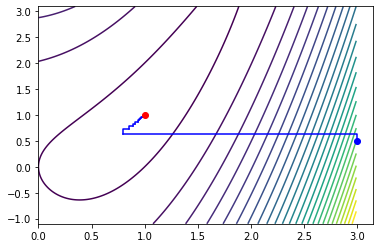

In [ ]:
result = coordinate_method(f2, [3, 0.5], 0.0000000001, save_lines=True)
plot = draw_func_level(f2, (0, 3), (-1.1, 3.1))
print(result['min'], result['iterations'])
print(f2(result['min']))
draw_lines(plot, result['lines'], [(3, 0.5)], result['min'])

##F3(x)

[2.9999865984866543, 0.49999675734392013] 98
2.8896923446657296e-11


<module 'pylab' from '/usr/local/lib/python3.6/dist-packages/pylab.py'>

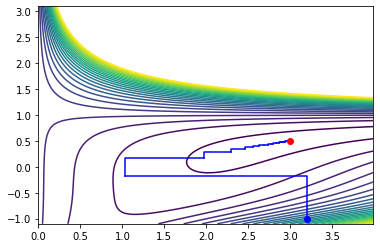

In [ ]:
result = coordinate_method(f3, [3.2, -1], 0.0000000001, save_lines=True)
plot = draw_func_level(f3, (0, 4), (-1.1, 3.1))
print(result['min'], result['iterations'])
print(f3(result['min']))
draw_lines(plot, result['lines'], [(3.2, -1)], result['min'])

##F4(x)

In [ ]:
result = coordinate_method(f4, [1, 1, 1, 1], 0.0000000001)
print(result['min'], result['iterations'])
print(f4(result['min']))

[0.0006214629576999991, -0.0006184676258052773, 0.005130392492696678, 0.005130392492696678] 1908
1.8150890860065148e-08


# Наискорейший спуск

##Реализация

In [ ]:
def dihotomy_0_optimization(func, a, b, eps):
  delta = eps/10
  while b-a > eps:
    x1 = (a+b)/2 - delta
    x2 = (a+b)/2 + delta

    f_x1 = func(x1)
    f_x2 = func(x2)

    if f_x1 > f_x2:
      a = x1
    elif f_x1 < f_x2:
      b = x2
    else:
      a, b = x1, x2

  return (b+a)/2

def fastest_method(f, x, eps, dx, max_iteration=10000, save_lines=False):
  count = 0
  lines = []
  x_current, x_prev = np.array(x.copy()), np.array(x.copy())

  while distance(dx, x_current) > eps:
    count += 1

    if count > max_iteration:
      count -= 1
      break
    
    dx_result = []
    for d_f in dx:
      dx_result.append(d_f(x_current))

    func = lambda a: f(x_current - a*np.array(dx_result))
    a = dihotomy_0_optimization(func, 0, 10, eps)
    
    x_prev = x_current.copy()

    for i in range(len(dx)):
      x_current[i] = x_prev[i] - a*dx[i](x_prev)
    
    if save_lines:
      arr = []
      arr.append(x_prev)
      arr.append(x_current)
      lines.append(np.array(arr).T)

  return {'min' : x_current,
          'iterations' : count,
          'lines': lines
          } 

##F1(x)

[0.99991663 0.99983278] 8695
6.973945509338252e-09


<module 'pylab' from '/usr/local/lib/python3.6/dist-packages/pylab.py'>

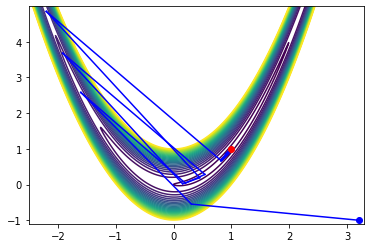

In [ ]:
result = fastest_method(f1, [3.2, -1], 0.0001, [f1_d1, f1_d2], save_lines=True)
plot = draw_func_level(f1, (-2.5, 3.3), (-1.1, 5))
print(result['min'], result['iterations'])
print(f1(result['min']))
draw_lines(plot, result['lines'], [(3.2, -1)], result['min'])

##F2(x)

[1.00008299 1.0002112 ] 111
8.931756267691712e-09


<module 'pylab' from '/usr/local/lib/python3.6/dist-packages/pylab.py'>

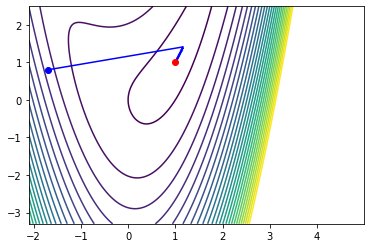

In [ ]:
result = fastest_method(f2, [-1.7, 0.8], 0.0001, [f2_d1, f2_d2], save_lines=True)
plot = draw_func_level(f2, (-2.1, 5), (-3.3, 2.5))
print(result['min'], result['iterations'])
print(f2(result['min']))
draw_lines(plot, result['lines'], [(-1.7, 0.8)], result['min'])

##F3(x)

[3.22846748 0.53985596] 1197
0.01073994697830317


<module 'pylab' from '/usr/local/lib/python3.6/dist-packages/pylab.py'>

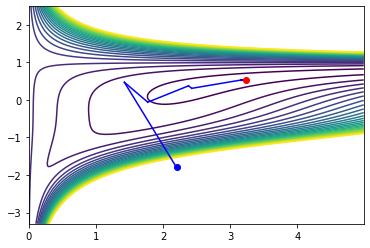

In [ ]:
result = fastest_method(f3, [2.2, -1.8], 0.01, [f3_d1, f3_d2], save_lines=True)
plot = draw_func_level(f3, (0, 5), (-3.3, 2.5))
print(result['min'], result['iterations'])
print(f3(result['min']))
draw_lines(plot, result['lines'], [(2.2, -1.8)], result['min'])

##F4(x)

In [ ]:
result = fastest_method(f4, [1.2, 1, 0.3, 1], 0.0001, [f4_d1, f4_d2, f4_d3, f4_d4])
print(result['min'], result['iterations'])
print(f4(result['min']))

[ 0.00060035 -0.00058047  0.01050808  0.0105064 ] 747
3.142465220346442e-07


# Проекционный градиент

##Реализация

In [ ]:
def dihotomy(func, a, b, eps):
  delta = eps/10
  while b-a > eps:
    x1 = (a+b)/2 - delta
    x2 = (a+b)/2 + delta

    f_x1 = func(x1)
    f_x2 = func(x2)

    if f_x1 > f_x2:
      a = x1
    elif f_x1 < f_x2:
      b = x2
    else:
      a, b = x1, x2

  return (b+a)/2

def project_point(borders, point):
  project = point.copy()
  for i in range(len(borders)):
    min, max = borders[i][0], borders[i][1]
    if min:
      if point[i] < min:
        point[i] = min
    if max:
      if point[i] > max:
        point[i] = max

  return project

def projection(f, df, x, borders, eps, graph=True):
  it = 0
  lines = []
  betha = 0.5

  x_current, x_pred = np.array(x.copy()), None

  while True:
    it += 1

    grad = []
    for fx in df:
      grad.append(fx(x_current))

    y = x_current - betha*np.array(grad)
    y_projected = project_point(borders, y)

    func = lambda p: f(x_current - p*(x_current - y_projected))
    p = dihotomy(func, 0, 1, eps)

    x_pred = x_current.copy()
    x_current = x_current - p*(x_current - y_projected)

    if graph:
      lines.append(np.array([x_pred, x_current]).T)

    if abs(f(x_current) - f(x_pred)) <= eps:
      break

  return {'iter': it, 'min': x_current, 'lines': lines}

##F1(x)

[1.12156341 1.25906716] 46
0.014912844929699512


<module 'pylab' from '/usr/local/lib/python3.6/dist-packages/pylab.py'>

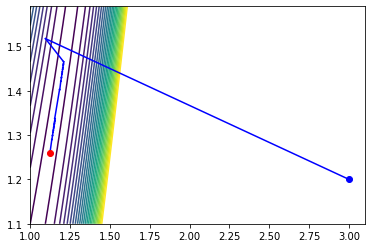

In [ ]:
result = projection(f1, [f1_d1, f1_d2], [3, 1.2], [(-2, 12), (6, 8)], 0.0001)
plot = draw_func_level(f1, (1, 3), (1.1, 1.6))
print(result['min'], result['iter'])
print(f1(result['min']))
draw_lines(plot, result['lines'], [(3, 1.2)], result['min'])

##F2(x)

[1.02385387 1.0618989 ] 27
0.0007545702176905067


<module 'pylab' from '/usr/local/lib/python3.6/dist-packages/pylab.py'>

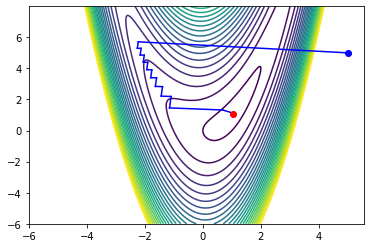

In [ ]:
result = projection(f2, [f2_d1, f2_d2], [5., 5.], [(-2, 4), (6, 0)], 0.0001)
plot = draw_func_level(f2, (-6, 5), (-6, 8))
print(result['min'], result['iter'])
print(f2(result['min']))
draw_lines(plot, result['lines'], [(5, 5)], result['min'])

##F3(x)

[2.68969257 0.40535561] 10
0.022987544568880088


<module 'pylab' from '/usr/local/lib/python3.6/dist-packages/pylab.py'>

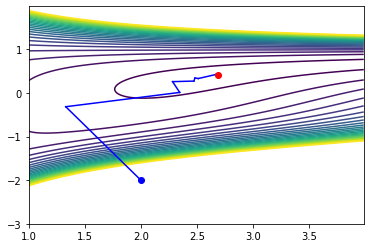

In [ ]:
result = projection(f3, [f3_d1, f3_d2], [2, -2], [(-2, 4), (6, 0)], 0.0001)
plot = draw_func_level(f3, (1, 4), (-3, 2))
print(result['min'], result['iter'])
print(f3(result['min']))
draw_lines(plot, result['lines'], [(2, -2)], result['min'])

##F4(x)

In [ ]:
result = projection(f4, [f4_d1, f4_d2, f4_d3, f4_d4], [2, -2, 4, 5], [(-2, 4), (6, 0)], 0.0001)
print(result['min'], result['iter'])
print(f4(result['min']))

[ 0.01329612 -0.0071071   0.06846262  0.07225918] 36
0.0006616120031091681


# Овражный градиент

##Реализация

In [ ]:
def step(x, f, dx, eps):
    
  x_current = x.copy()

  dx_result = []
  for d_f in dx:
    dx_result.append(d_f(x_current))

  func = lambda a: f(x_current - a*np.array(dx_result))
  a = dihotomy_0_optimization(func, 0, 10, eps)
    
  x_prev = x_current.copy()

  for i in range(len(dx)):
    x_current[i] = x_prev[i] - a*dx[i](x_prev)
 
  return x_current

def ravine(f, dx, v0, eps, save_lines=False):
  count = 0
  lines = []

  v1 = np.array(v0) + eps
  x_current, x_prev = step(v1, f, dx, eps), np.array(step(v0, f, dx, eps))

  if save_lines:
    lines.append(np.array([v0, x_prev]).T)
    lines.append(np.array([v1, x_current]).T)
    lines.append(np.array([x_prev, x_current]).T)

  count += 2

  cos_current = 0

  while abs(f(x_current) - f(x_prev)) > eps:
    count += 1
    
    v = (x_current - x_prev)/distance(x_current, x_prev)
    func =lambda  a:  f(x_current - a*v)
    a = dihotomy_0_optimization(func, -10, 10, eps)

    v_point = x_current - a*v
    x_prev = x_current.copy()
    x_current = step(v_point, f, dx, eps)

    if save_lines:
      lines.append(np.array([x_prev, v_point]).T)
      lines.append(np.array([v_point, x_current]).T)
      lines.append(np.array([x_prev, x_current]).T)
    

  return {'iterations': count,
          'min': x_current,
          'lines': lines
          }

##F1(x)

[0.99929973 0.9985976 ] 45
4.909294961974486e-07


<module 'pylab' from '/usr/local/lib/python3.6/dist-packages/pylab.py'>

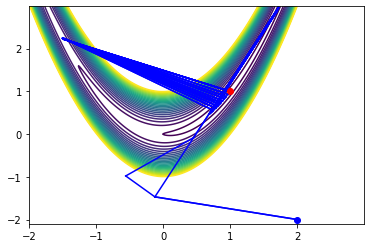

In [ ]:
result = ravine(f1, [f1_d1, f1_d2], [2, -2], 0.00001, save_lines=True)
plot = draw_func_level(f1, (-2, 3), (-2.1, 3))
print(result['min'], result['iterations'])
print(f1(result['min']))
draw_lines(plot, result['lines'], [(2, -2)], result['min'])

##F2(x)

[1.00000529 1.00001251] 7
3.1697676503133274e-11


<module 'pylab' from '/usr/local/lib/python3.6/dist-packages/pylab.py'>

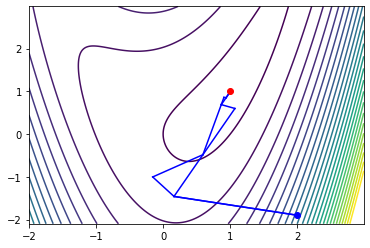

In [ ]:
result = ravine(f2, [f2_d1, f2_d2], [2, -1.9], 0.0001, save_lines=True)
plot = draw_func_level(f2, (-2, 3), (-2.1, 3))
print(result['min'], result['iterations'])
print(f2(result['min']))
draw_lines(plot, result['lines'], [(2, -1.9)], result['min'])

##F3(x)

[-1.20382887  1.53356758] 4
1.3864516762158865


<module 'pylab' from '/usr/local/lib/python3.6/dist-packages/pylab.py'>

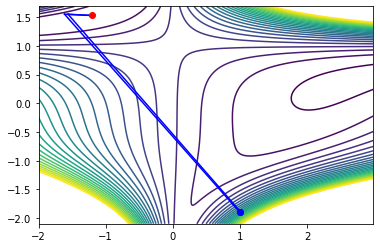

In [ ]:
result =  ravine(f3, [f3_d1, f3_d2], [1, -1.9], 0.01, save_lines=True)
plot = draw_func_level(f3, (-2, 3), (-2.1, 1.7))
print(result['min'], result['iterations'])
print(f3(result['min']))
draw_lines(plot, result['lines'], [(1, -1.9), (1.00001, -1.89999)], result['min'])

##F4(x)

In [ ]:
result = ravine(f4, [f4_d1, f4_d2, f4_d3, f4_d4], [1.2, 1, 0.3, 1], 0.0001)
print(result['min'], result['iterations'])
print(f4(result['min']))

[ 0.04781487 -0.0550789  -0.03660772 -0.03627446] 12
0.0005534222928421612
